<a href="https://colab.research.google.com/github/Observersss/mss_lab_1/blob/main/mss_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

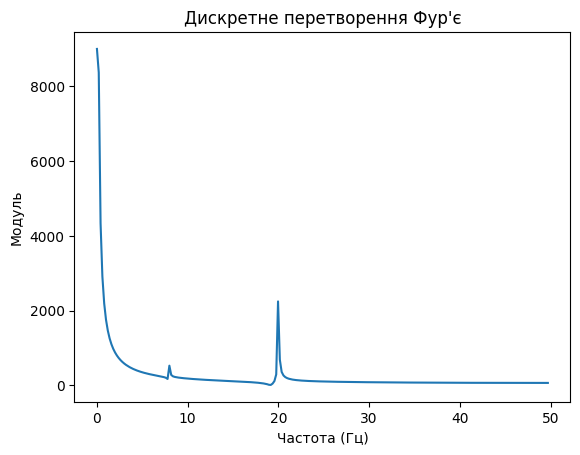

In [3]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('f15.txt')  # Завантаження даних з fk.txt
N = len(data)
T = 5  # Загальний час спостереження
dt = 0.01  # Крок часу
t = np.arange(0, N*dt, dt)  # Вектор часу
def model_function(a, t, f):
    # Поліноміальна частина
    y = a[0] * t**3 + a[1] * t**2 + a[2] * t + a[-1]
    # Синусоїдальна частина
    for i in range(3, len(a)-1):
        y += a[i] * np.sin(2 * np.pi * f[i-3] * t - 3 * t)
    return y
from scipy.optimize import curve_fit

# Початкові параметри
a0 = np.random.rand(7)  # Підберіть кількість параметрів
f0 = [1, 2, 3]  # Частоти для синусоїдальних компонентів

# Цільова функція для підбору
def target_function(t, *a):
    return model_function(a, t, f0)

# Підбір параметрів за методом найменших квадратів
a_fit, _ = curve_fit(target_function, t, data, p0=a0)
X = np.fft.fft(data)
f = np.fft.fftfreq(N, d=dt)

# Побудова графіку модуля DFT
plt.figure()
plt.plot(f[:N//2], np.abs(X[:N//2]))
plt.title("Дискретне перетворення Фур'є")
plt.xlabel("Частота (Гц)")
plt.ylabel("Модуль")
plt.show()
